In [68]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions


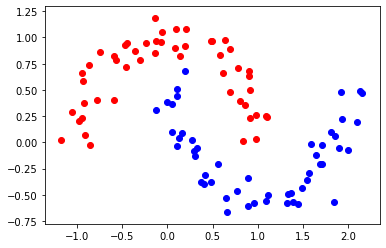

In [69]:
x,y = make_moons(n_samples=100,noise=0.1)
plt.figure()
plt.scatter(x[y==0,0],x[y==0,1],c='r')
plt.scatter(x[y==1,0],x[y==1,1],c='b')

In [70]:
def boundry_svm(X,y,xmodel):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = xmodel.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z,  alpha=0.4)

    plt.scatter(X[:, 0], X[:, 1], c=[iy*.5 for iy in y],s=20,edgecolors='k')
    plt.show()

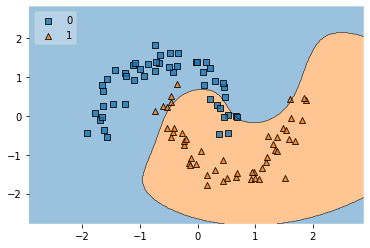

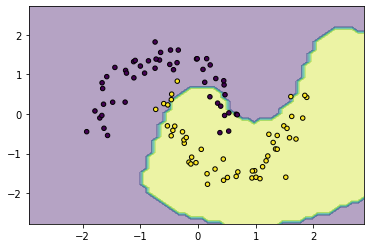

In [77]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x)
model = SVC(kernel='rbf',C=10,gamma=1)
model.fit(x,y)


plot_decision_regions(x_s, y, clf=model, legend=2)
boundry_svm(x_s,y,model)    

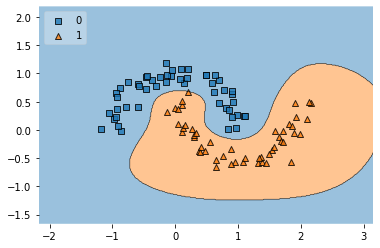

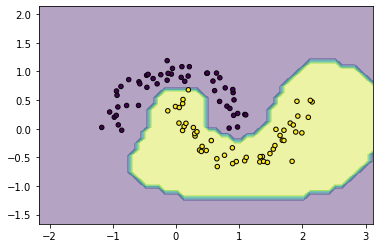

In [78]:
from sklearn.pipeline import Pipeline
pipe_list=[('sc',scaler),('svm_model',SVC(kernel ='rbf',C=10,gamma=1))]
# pipe_list=[('scaler',scaler),('svm_model',model)]

pipe_model = Pipeline(pipe_list)
pipe_model.fit(x,y)

plot_decision_regions(x, y, clf=pipe_model, legend=2)
boundry_svm(x,y,pipe_model)    